In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


In [29]:
data = pd.read_csv('/Users/meghanabollepalli/Downloads/H_E_Attrition.csv.xls')
data.head(5)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Text(0.5, 1.0, 'Education Field Percentage')

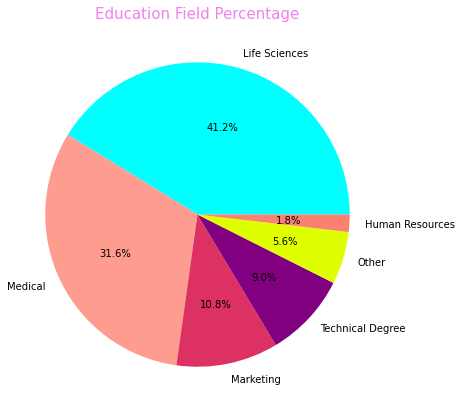

In [30]:
col=["#00ffff","#fe9c8f","#DE3163","#800080","#DFFF00","#FA8072"]
plt.figure(figsize=(8,7))
plt.pie(data.EducationField.value_counts().values,labels=data.EducationField.value_counts().index,colors=col,autopct="%1.1f%%")
plt.title("Education Field Percentage",color="violet",fontsize=15)

# Model Building

In [31]:
#From phase 1 correlation observation I'm simply removing unnecessary columns from data
data_r = data.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'], axis=1)

In [32]:
#in phase1 we have label encoded only over18 but for model building in phase 2 we are changing all our numeric to cetegorical. 
for i in data_r.columns:
    if data_r[i].dtype == np.number:
        continue
    data_r[i] = LabelEncoder().fit_transform(data_r[i])

/var/folders/v6/sdgnh8xj1vq8sw7mzgx9x6cw0000gn/T/ipykernel_53078/3653780856.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data_r[i].dtype == np.number:


In [33]:
#Attrition is made as first column by reordering dataset so that it can be easy to split.
data_r.insert(0, 'Attrition', data_r.pop('Attrition'))

In [34]:
#took categorical variable to numerical by replacing yes with 1 and no with 0 for easy recognization as it is target variable.
data_r.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

In [35]:
print(data_r.iloc[:, 1:])

      Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      23               2        624           2                 0          1   
1      31               1        113           1                 7          0   
2      19               2        805           1                 1          1   
3      15               1        820           1                 2          3   
4       9               2        312           1                 1          0   
...   ...             ...        ...         ...               ...        ...   
1465   18               1        494           1                22          1   
1466   21               2        327           1                 5          0   
1467    9               2         39           1                 3          2   
1468   31               1        579           2                 1          2   
1469   16               2        336           1                 7          2   

      EducationField  Envir

In [36]:
print(data_r.iloc[:, 0])

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64


In [37]:
#splitting the dataset where x_r is independent variable which consists of all columns except attrition and data is reshaped
#y_r is dependent variable which consists of only attrition
X_r = data_r.iloc[:, 1:data_r.shape[1]].values
Y_r = data_r.iloc[:, 0].values

In [38]:
#splitting the data to train and test it for 70% of training and 30 on testing
train_x, test_x,train_y, test_y = train_test_split(X_r, Y_r, test_size=0.3, random_state=0)

# Multi Linear Regression

In [61]:
from sklearn import linear_model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_li = linear_model.LinearRegression()
model_li.fit(train_x, train_y)
score_li = model_li.score(test_x, test_y) 
score_li

0.2229130288623502

# Logistic

In [40]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression( max_iter=5000)
model_log.fit(train_x, train_y)

# Get accuracy on testing data
score_log = model_log.score(test_x, test_y)
score_log

0.891156462585034

In [41]:
pred_log=model_log.predict(test_x)
pred_log

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

<AxesSubplot:>

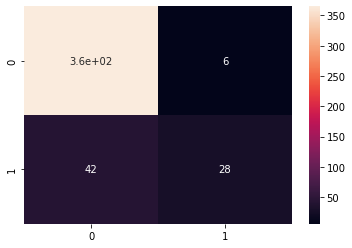

In [42]:
import seaborn as sns
cm = confusion_matrix(test_y,pred_log)
sns.heatmap(cm, annot=True)

/Users/meghanabollepalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


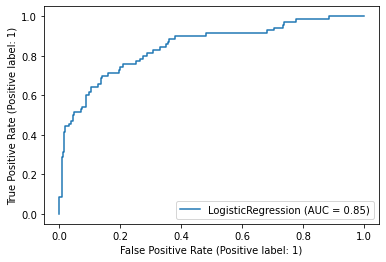

In [43]:
metrics.plot_roc_curve(model_log, test_x, test_y)
plt.show()

# Random forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

RandomF = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
RandomF.fit(train_x, train_y)

# Get accuracy on testing data
score_r=RandomF.score(test_x, test_y)
score_r

0.8616780045351474

<AxesSubplot:>

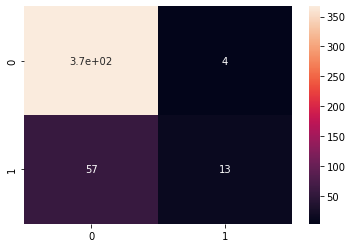

In [45]:

import seaborn as sns
cm = confusion_matrix(test_y,RandomF.predict(test_x))
sns.heatmap(cm, annot=True)

/Users/meghanabollepalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


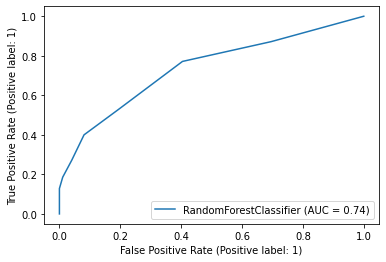

In [46]:
metrics.plot_roc_curve(RandomF, test_x, test_y)
plt.show()

# SVM

In [47]:
from sklearn.svm import SVC


model_s=SVC() 
model_s.fit(train_x,train_y)
pred=model_s.predict(test_x)

# Get accuracy on testing data
score_svm=metrics.accuracy_score(test_y,pred)
score_svm

0.8412698412698413

<AxesSubplot:>

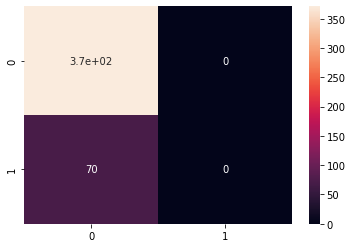

In [48]:
import seaborn as sns
cm = confusion_matrix(test_y,pred)
sns.heatmap(cm, annot=True)

/Users/meghanabollepalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


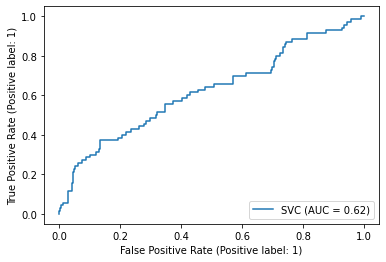

In [49]:
metrics.plot_roc_curve(model_s, test_x, test_y)
plt.show()

# Decision tree


In [50]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree  import DecisionTreeClassifier

model_bbg = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier()
                                           , sampling_strategy='not majority', replacement=False, random_state=42)
model_bbg.fit(train_x, train_y)
score_d=model_bbg.score(test_x , test_y)
score_d

0.8639455782312925

In [51]:
pred_bbg = model_bbg.predict(test_x)
pred_bbg

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

<AxesSubplot:>

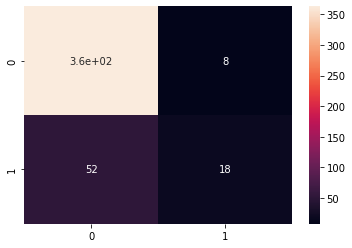

In [53]:
import seaborn as sns
cm = confusion_matrix(test_y,pred_bbg)
sns.heatmap(cm, annot=True)

/Users/meghanabollepalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


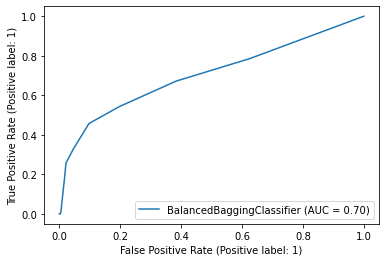

In [52]:
metrics.plot_roc_curve(model_bbg, test_x, test_y)
plt.show()

# All models visualization.

/Users/meghanabollepalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mean square error')

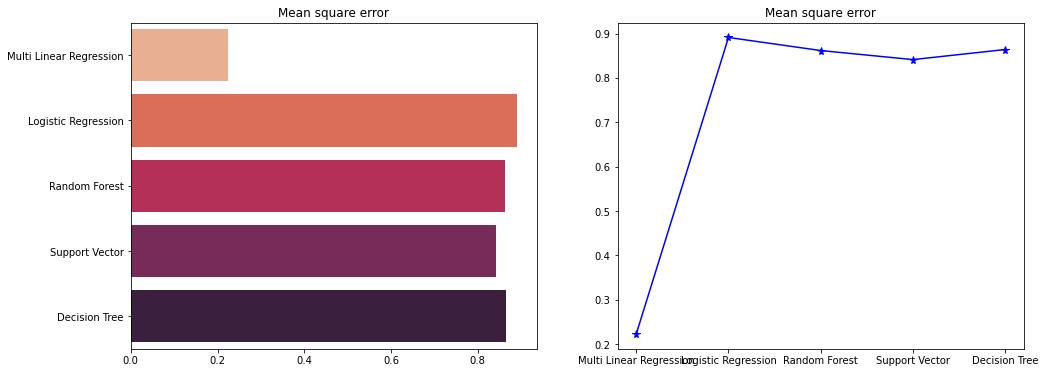

In [62]:
plt.figure(figsize = (16 , 6))
plt.subplot(1,2,1)
x = ['Multi Linear Regression','Logistic Regression','Random Forest' ,'Support Vector' ,'Decision Tree',]
y = [score_li.mean() , score_log.mean() ,score_r.mean() , score_svm.mean() , score_d.mean()]
plt.title('Mean square error')
sns.barplot(y,x,palette="rocket_r")

plt.subplot(1,2,2)
plt.plot(x ,y,marker = '*' ,color = 'b' ,ms =8 )
plt.title('Mean square error')

we obtained less mean sq error for both Linear and SVC,RF are nearly same and data is performing best with logistic regression.